In [34]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
cd "/content/drive/MyDrive/Colab Notebooks/dw_transform"

/content/drive/MyDrive/Colab Notebooks/dw_transform


In [4]:
ls data

men_shoes.csv  shoes_prices.csv


In [7]:
df = pd.read_csv("data/men_shoes.csv", low_memory=False)
df.shape

(18280, 48)

In [8]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [10]:
mean_price = np.mean(df["prices_amountmin"])
mean_price

93.53952188183217

In [16]:
y_true = df["prices_amountmin"]
y_pred = [mean_price] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

63.968341227870624

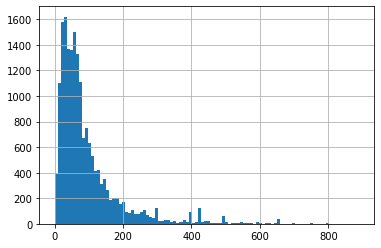

In [17]:
df["prices_amountmin"].hist(bins=100)

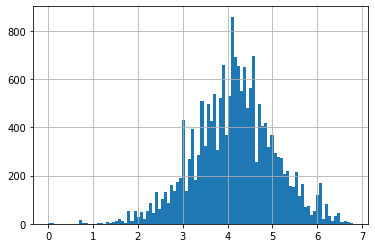

In [18]:
np.log( df["prices_amountmin"] + 1).hist(bins=100)

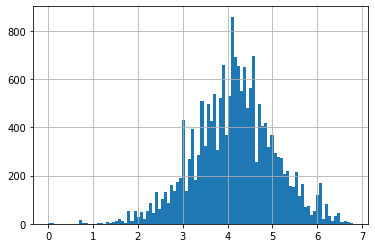

In [20]:
np.log1p( df["prices_amountmin"] ).hist(bins=100)

In [24]:
np.median(y_true)

64.95

In [25]:
y_true = df["prices_amountmin"]
y_pred = [np.median(y_true)] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.01120240700219

In [28]:
y_true = df["prices_amountmin"]
price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) )
y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true, y_pred)

58.03539547661041

In [26]:
np.mean( np.log1p(y_true) )

4.157759197235119

In [27]:
np.exp( np.mean( np.log1p(y_true) ) ) - 1

62.92811169273113

In [29]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [30]:
df.brand.value_counts()

Nike                  1709
PUMA                   574
Ralph Lauren           524
New Balance            361
VANS                   356
                      ... 
J.D. Fisk                1
ralph lauren yacht       1
Base London              1
AIR BALANCE              1
Care Apparel             1
Name: brand, Length: 1856, dtype: int64

In [31]:
df["brand"].factorize()

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [32]:
df["brand"].factorize()[0]

array([  0,   0,   1, ..., 411, 411, 411])

In [33]:
df["brand_cat"] = df["brand"].factorize()[0]

In [37]:
feats = ["brand_cat"]
X = df[feats].values 
y = df["prices_amountmin"].values 

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [39]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [40]:
def run_model(feats):
  X = df[feats].values 
  y = df["prices_amountmin"].values 

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
  return np.mean(scores), np.std(scores)

In [41]:
run_model(["brand_cat"])

(-58.38655694633361, 4.223555478221712)

In [ ]:
df["colors"].value_counts()

In [50]:
df["colors_cat"] = df["colors"].factorize()[0]
run_model(["colors_cat"])

(-62.72404880129134, 5.053649873215771)

In [55]:
run_model(["colors_cat", "brand_cat"])

(-61.4460058212821, 5.444747383187681)

In [ ]:
df["manufacturer"].value_counts()

In [53]:
df["manufacturer_cat"] = df["manufacturer"].factorize()[0]
run_model(["manufacturer_cat"])

(-63.133649278023746, 3.394307434888982)

In [54]:
run_model(["manufacturer_cat", "brand_cat"])

(-58.539304199085976, 4.3112232316154415)

In [56]:
run_model(["manufacturer_cat", "brand_cat", "colors_cat"])

(-61.76723637561057, 5.743222840525922)

In [69]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   transform_one/day_4.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [70]:
!git add transform_one/day_4.ipynb

In [61]:
!git config --global user.email "paulina.w.rakowska@gmail.com"
!git config --global user.name "Paulina Rakowska"

In [68]:
!git push origin main

Counting objects: 4, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 15.70 KiB | 3.14 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/PaulinaRakowska/dw_transform.git
   747dc05..70caaeb  main -> main
